# EDA

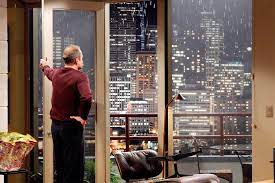

In [1]:
# Timothy Stevens  -  Seller 
# Owns expensive houses in the center, needs to get rid, best timing within a year, 
# open for renovation when profits rise

# Hypotheses:
# In colder seasons, houses sell better.
# Houses get a significantly higher price after renovation (even after substraction of costs).

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno as msno
import geopandas as gpd
import folium
from shapely.geometry import Point
import matplotlib.pyplot as plt
from IPython.display import display, IFrame


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)



In [3]:
# Reading my csv file
df = pd.read_csv('data/eda.csv')

# Converting the date to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.head()
df.price.count()

21597

In [4]:
# Checking distributions with histograms & box plots for all numeric values
#for column in df.select_dtypes(include='number'):
    #sns.histplot(x=df[column])
    #plt.title(f'Histogram for {column}')
    #plt.show()

#for column in df.select_dtypes(include='number'):
    #sns.boxplot(x=df[column])
    #plt.title(f'Box plot for {column}')
    #plt.show()


# Based on the box plots/histograms we see outliers in: bedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, sqft_living15, sqft_lot15, price
# I will remove outliers for the house prices (and sqft_lot, sqft_living later on) to be able to visually map price/sqft_lot values
# on my map and detect price/sqft_lot levels in certain areas.

In [5]:
df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,3,8,...,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000
21593,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,3,8,...,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000
21594,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,...,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000
21595,291310100,3.000,2.500,1600.000,2388.000,2.000,NaN,0.000,3,8,...,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000


In [6]:
# Changing the column names
df.describe()
df = df.rename(
    {'zipcode':'zip_code',
    'date': 'selling_date',
    'yr_built': 'year_built',
    'yr_renovated': 'year_renovated'},
    axis=1)
df

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,year_built,year_renovated,zip_code,lat,long,sqft_living15,sqft_lot15,selling_date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,3,8,...,0.000,2009,0.000,98103,47.699,-122.346,1530.000,1509.000,2014-05-21,360000.000
21593,6600060120,4.000,2.500,2310.000,5813.000,2.000,0.000,0.000,3,8,...,0.000,2014,0.000,98146,47.511,-122.362,1830.000,7200.000,2015-02-23,400000.000
21594,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,...,0.000,2009,0.000,98144,47.594,-122.299,1020.000,2007.000,2014-06-23,402101.000
21595,291310100,3.000,2.500,1600.000,2388.000,2.000,NaN,0.000,3,8,...,0.000,2004,0.000,98027,47.535,-122.069,1410.000,1287.000,2015-01-16,400000.000


In [7]:
# changing the order of columns
df = df.reindex(
    ['id', 'selling_date', 'sqft_living', 'sqft_lot', 
     'bedrooms', 'bathrooms', 'floors', 'sqft_basement', 
     'condition', 'grade', 'year_built', 'year_renovated', 'zip_code', 'lat', 'long',
     'sqft_living15', 'sqft_lot15', 'waterfront', 'view', 'price'], axis=1)
df.head(40)

,id,selling_date,sqft_living,sqft_lot,bedrooms,bathrooms,floors,sqft_basement,condition,grade,year_built,year_renovated,zip_code,lat,long,sqft_living15,sqft_lot15,waterfront,view,price
0,7129300520,2014-10-13,1180.000,5650.000,3.000,1.000,1.000,0.000,3,7,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,NaN,0.000,221900.000
1,6414100192,2014-12-09,2570.000,7242.000,3.000,2.250,2.000,400.000,3,7,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,0.000,0.000,538000.000
2,5631500400,2015-02-25,770.000,10000.000,2.000,1.000,1.000,0.000,3,6,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,0.000,0.000,180000.000
3,2487200875,2014-12-09,1960.000,5000.000,4.000,3.000,1.000,910.000,5,7,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,0.000,0.000,604000.000
4,1954400510,2015-02-18,1680.000,8080.000,3.000,2.000,1.000,0.000,3,8,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,0.000,0.000,510000.000
5,7237550310,2014-05-12,5420.000,101930.000,4.000,4.500,1.000,1530.000,3,11,2001,0.000,98053,47.656,-122.005,4760.000,101930.000,0.000,0.000,1230000.000
6,1321400060,2014-06-27,1715.000,6819.000,3.000,2.250,2.000,NaN,3,7,1995,0.000,98003,47.310,-122.327,2238.000,6819.000,0.000,0.000,257500.000
7,2008000270,2015-01-15,1060.000,9711.000,3.000,1.500,1.000,0.000,3,7,1963,0.000,98198,47.410,-122.315,1650.000,9711.000,0.000,NaN,291850.000
8,2414600126,2015-04-15,1780.000,7470.000,3.000,1.000,1.000,730.000,3,7,1960,0.000,98146,47.512,-122.337,1780.000,8113.000,0.000,0.000,229500.000
9,3793500160,2015-03-12,1890.000,6560.000,3.000,2.500,2.000,0.000,3,7,2003,0.000,98038,47.368,-122.031,2390.000,7570.000,0.000,0.000,323000.000


In [8]:
# checking the current types of columns values
df.dtypes

id                         int64
selling_date      datetime64[ns]
sqft_living              float64
sqft_lot                 float64
bedrooms                 float64
bathrooms                float64
floors                   float64
sqft_basement            float64
condition                  int64
grade                      int64
year_built                 int64
year_renovated           float64
zip_code                   int64
lat                      float64
long                     float64
sqft_living15            float64
sqft_lot15               float64
waterfront               float64
view                     float64
price                    float64
dtype: object

In [9]:
# Assuming df is your DataFrame
df.sort_values(by='selling_date', ascending=True, inplace=True)

# Display the DataFrame with the 'selling_date' column sorted in descending order
print(df[['selling_date']])

      selling_date
7316    2014-05-02
20586   2014-05-02
1040    2014-05-02
20543   2014-05-02
9587    2014-05-02
...            ...
19381   2015-05-14
12623   2015-05-14
5632    2015-05-15
13040   2015-05-24
16580   2015-05-27

[21597 rows x 1 columns]


In [10]:
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['zip_code'] = df['zip_code'].astype('category')
df['waterfront'] = df['waterfront'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 7316 to 16580
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21597 non-null  int64         
 1   selling_date    21597 non-null  datetime64[ns]
 2   sqft_living     21597 non-null  float64       
 3   sqft_lot        21597 non-null  float64       
 4   bedrooms        21597 non-null  float64       
 5   bathrooms       21597 non-null  float64       
 6   floors          21597 non-null  float64       
 7   sqft_basement   21145 non-null  float64       
 8   condition       21597 non-null  category      
 9   grade           21597 non-null  category      
 10  year_built      21597 non-null  int64         
 11  year_renovated  17749 non-null  float64       
 12  zip_code        21597 non-null  category      
 13  lat             21597 non-null  float64       
 14  long            21597 non-null  float64       
 15  sqft

In [11]:
df.isna().sum()

id                   0
selling_date         0
sqft_living          0
sqft_lot             0
bedrooms             0
bathrooms            0
floors               0
sqft_basement      452
condition            0
grade                0
year_built           0
year_renovated    3848
zip_code             0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
waterfront           0
view                63
price                0
dtype: int64

<Axes: >

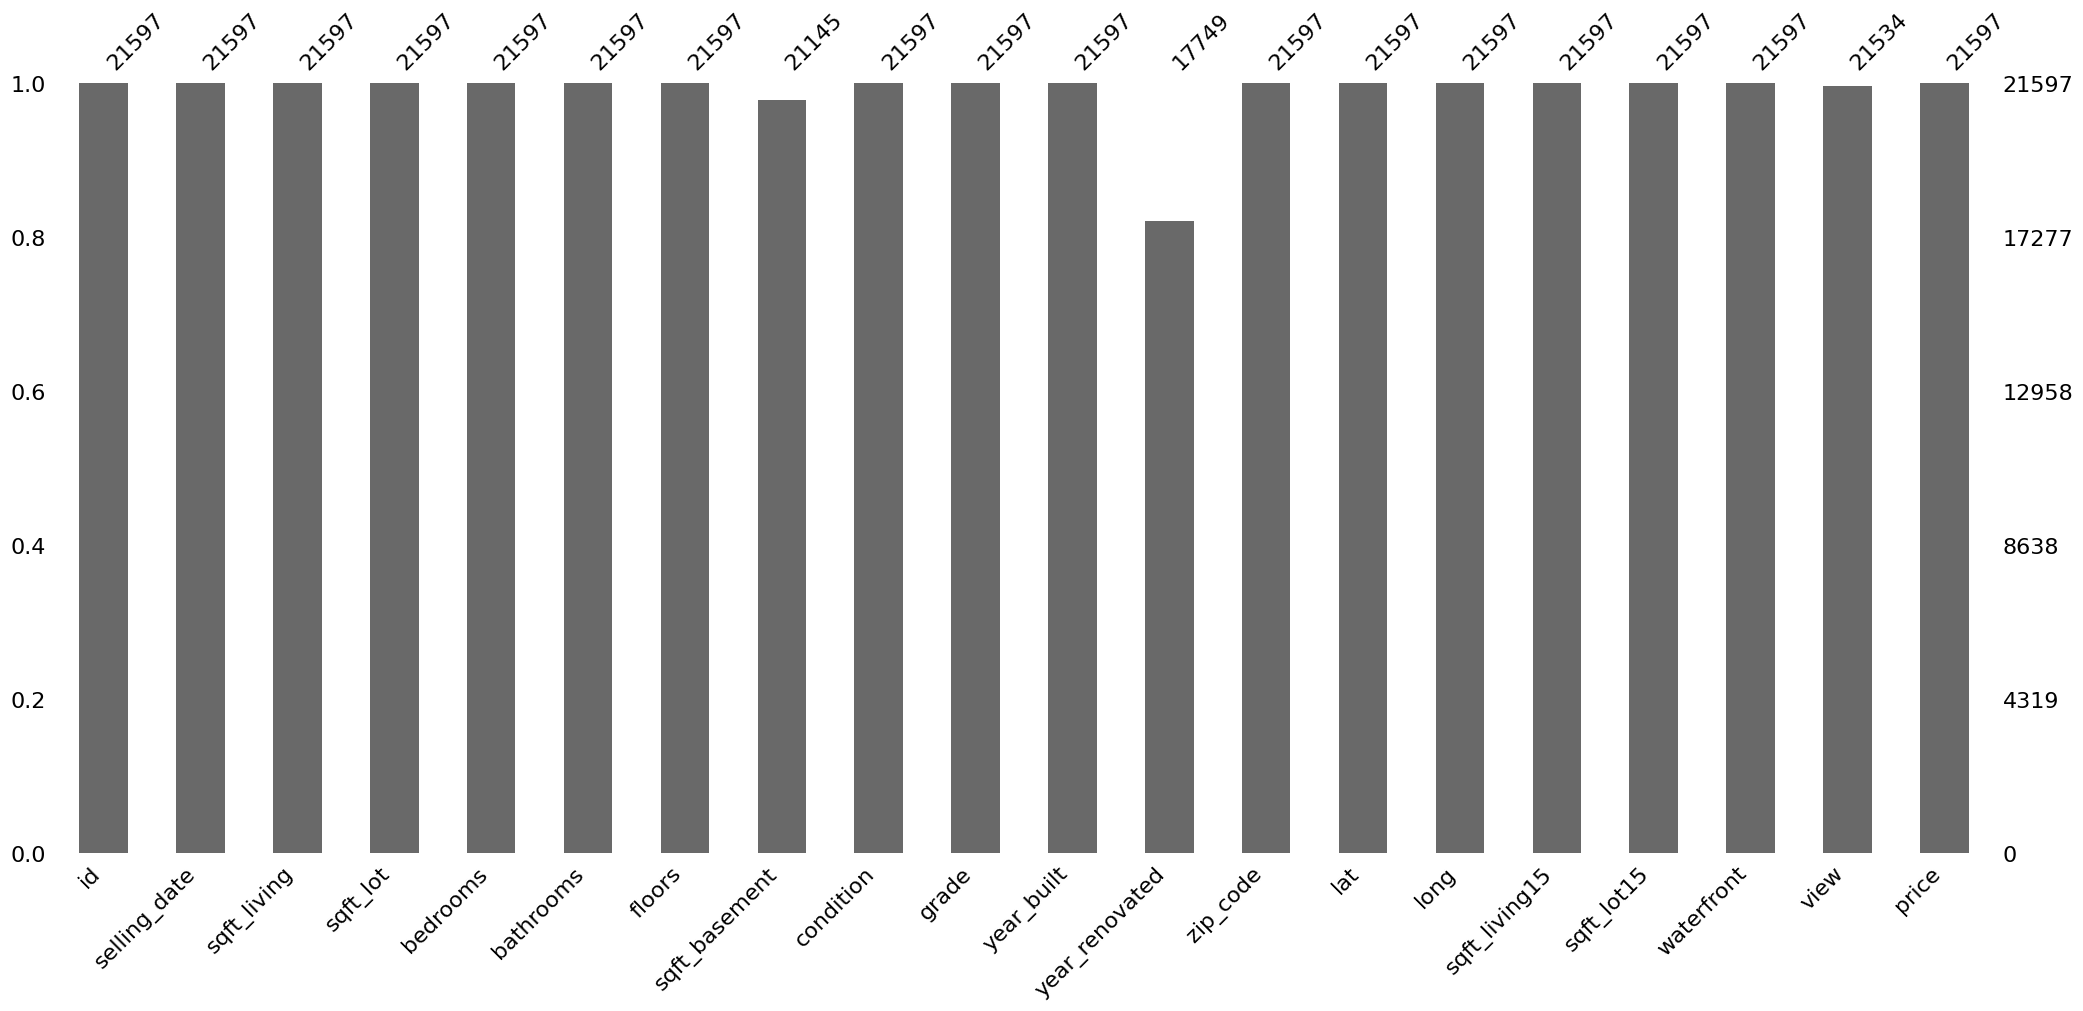

In [12]:
# plotting percentage of missing values per column
msno.bar(df)

<Axes: >

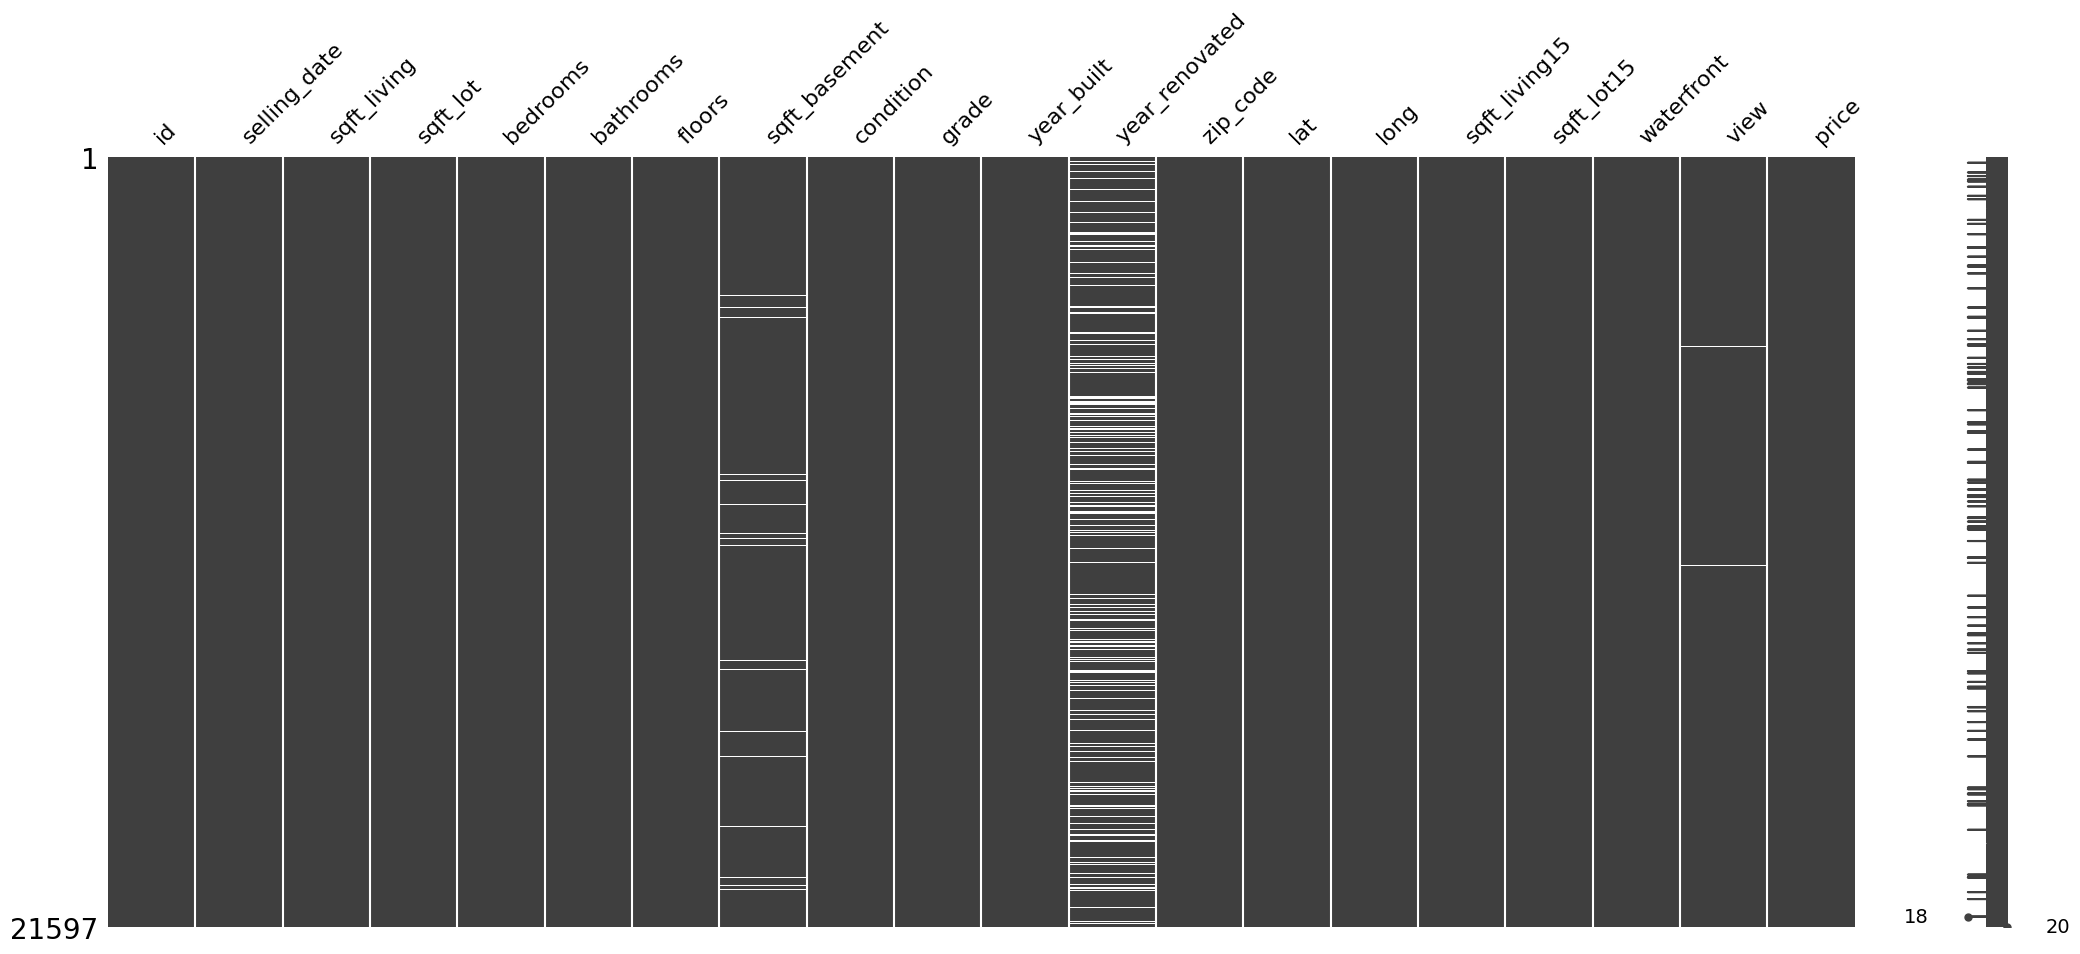

In [13]:
# Checking if there are reasons for missing values e.g. because of Sunday (interval/repeating)
msno.matrix(df)

In [14]:
# no patterns found --> random missing values

<Axes: >

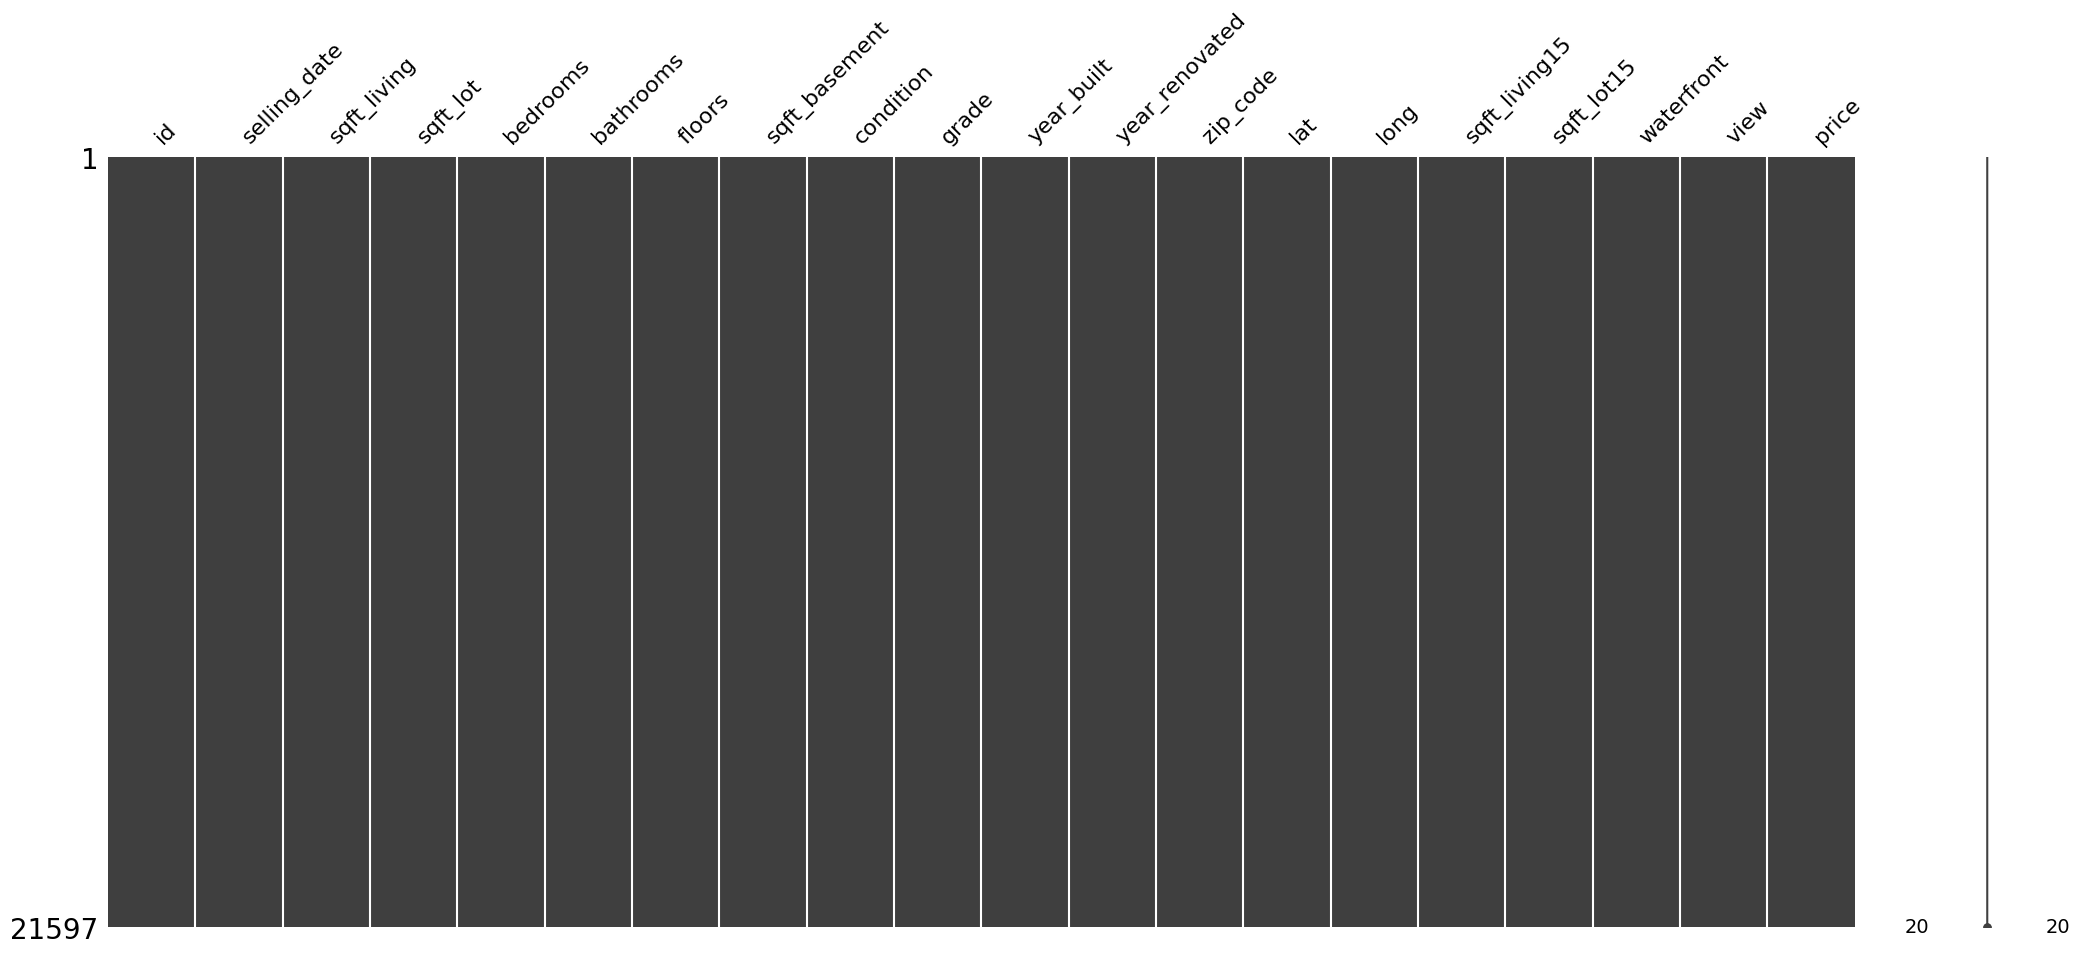

In [15]:
# Cleaning empty rows by adding 0 for in the columns below
df = df.fillna({'view': 0})
df = df.fillna({'waterfront': 0})
df = df.fillna({'sqft_basement': 0})               
df = df.fillna({'year_renovated': 0})

#Removing the last 0 in yr_renovated
df['year_renovated'] = df['year_renovated'] / 10

msno.matrix(df)

In [16]:
df

,id,selling_date,sqft_living,sqft_lot,bedrooms,bathrooms,floors,sqft_basement,condition,grade,year_built,year_renovated,zip_code,lat,long,sqft_living15,sqft_lot15,waterfront,view,price
7316,2202500290,2014-05-02,1450.000,8800.000,4.000,1.000,1.000,0.000,4,7,1954,0.000,98006,47.575,-122.135,1260.000,8942.000,False,0.000,435000.000
20586,7853361370,2014-05-02,3310.000,6500.000,4.000,2.500,2.000,0.000,3,8,2012,0.000,98065,47.515,-121.870,2380.000,5000.000,False,0.000,555000.000
1040,7197300105,2014-05-02,1940.000,10500.000,4.000,2.500,1.000,800.000,4,7,1976,0.000,98052,47.683,-122.114,2200.000,10500.000,True,0.000,550000.000
20543,3438501320,2014-05-02,1630.000,1368.000,2.000,2.500,2.000,350.000,3,7,2009,0.000,98106,47.549,-122.363,1590.000,2306.000,False,0.000,295000.000
9587,472000620,2014-05-02,2600.000,4750.000,3.000,2.500,1.000,900.000,4,9,1951,0.000,98117,47.683,-122.400,2380.000,4750.000,False,0.000,790000.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,8149600265,2015-05-14,1980.000,5850.000,4.000,1.750,1.000,600.000,4,8,1960,0.000,98116,47.561,-122.391,1810.000,5850.000,True,1.000,725000.000
12623,4166600610,2015-05-14,1410.000,44866.000,3.000,2.000,1.000,0.000,4,7,1985,0.000,98023,47.327,-122.370,2950.000,29152.000,False,0.000,335000.000
5632,7923600250,2015-05-15,1870.000,7344.000,5.000,2.000,1.500,0.000,3,7,1960,0.000,98007,47.595,-122.144,1870.000,7650.000,False,0.000,450000.000
13040,5101400871,2015-05-24,1390.000,6670.000,2.000,1.750,1.000,670.000,3,6,1941,0.000,98115,47.691,-122.308,920.000,6380.000,False,0.000,445500.000


In [17]:
# Remove three decimal places and convert to integers
columns_to_round = ['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors', 'sqft_basement', 'year_renovated', 'sqft_living15', 'sqft_lot15', 'price']
df[columns_to_round] = df[columns_to_round].round(decimals=0).astype(int)
#df['year_renovated'] = df['year_renovated'] / 10
df

,id,selling_date,sqft_living,sqft_lot,bedrooms,bathrooms,floors,sqft_basement,condition,grade,year_built,year_renovated,zip_code,lat,long,sqft_living15,sqft_lot15,waterfront,view,price
7316,2202500290,2014-05-02,1450,8800,4,1,1,0,4,7,1954,0,98006,47.575,-122.135,1260,8942,False,0.000,435000
20586,7853361370,2014-05-02,3310,6500,4,2,2,0,3,8,2012,0,98065,47.515,-121.870,2380,5000,False,0.000,555000
1040,7197300105,2014-05-02,1940,10500,4,2,1,800,4,7,1976,0,98052,47.683,-122.114,2200,10500,True,0.000,550000
20543,3438501320,2014-05-02,1630,1368,2,2,2,350,3,7,2009,0,98106,47.549,-122.363,1590,2306,False,0.000,295000
9587,472000620,2014-05-02,2600,4750,3,2,1,900,4,9,1951,0,98117,47.683,-122.400,2380,4750,False,0.000,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,8149600265,2015-05-14,1980,5850,4,2,1,600,4,8,1960,0,98116,47.561,-122.391,1810,5850,True,1.000,725000
12623,4166600610,2015-05-14,1410,44866,3,2,1,0,4,7,1985,0,98023,47.327,-122.370,2950,29152,False,0.000,335000
5632,7923600250,2015-05-15,1870,7344,5,2,2,0,3,7,1960,0,98007,47.595,-122.144,1870,7650,False,0.000,450000
13040,5101400871,2015-05-24,1390,6670,2,2,1,670,3,6,1941,0,98115,47.691,-122.308,920,6380,False,0.000,445500


<Figure size 1000x600 with 0 Axes>

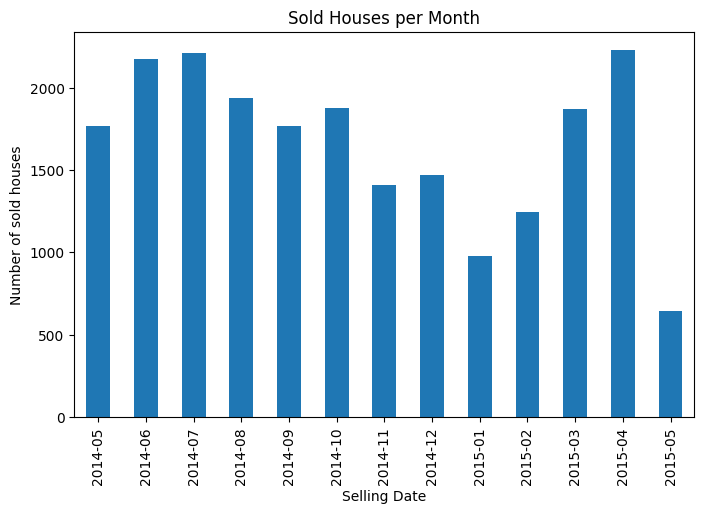

In [18]:
# Group by month and count occurrences
df_counts = df.groupby(df['selling_date'].dt.to_period("M")).size().reset_index(name='count')

# Sort by month
df_counts.sort_values(by='selling_date', inplace=True)

# Plot the bar chart
plt.figure(figsize=(10, 6))
df_counts.plot(x='selling_date', y='count', kind='bar', legend=False)
plt.title('Sold Houses per Month')
plt.xlabel('Selling Date')
plt.ylabel('Number of sold houses')
plt.show()

In [19]:
# Zip codes of central area - areas are chosen based on blog posts and online rankings of best central and neighbourhoods in Seattle.
capitol_hill = [98102, 98112, 98122]
fremont = [98103, 98107, 98109]
queen_anne = [98109, 98119]
central_zip_codes = capitol_hill + fremont + queen_anne

# Creating a new column called 'central_area' - checking whether zip code is in the central area or not (True/False)
df['central_area'] = df['zip_code'].isin(central_zip_codes)
df

,id,selling_date,sqft_living,sqft_lot,bedrooms,bathrooms,floors,sqft_basement,condition,grade,...,year_renovated,zip_code,lat,long,sqft_living15,sqft_lot15,waterfront,view,price,central_area
7316,2202500290,2014-05-02,1450,8800,4,1,1,0,4,7,...,0,98006,47.575,-122.135,1260,8942,False,0.000,435000,False
20586,7853361370,2014-05-02,3310,6500,4,2,2,0,3,8,...,0,98065,47.515,-121.870,2380,5000,False,0.000,555000,False
1040,7197300105,2014-05-02,1940,10500,4,2,1,800,4,7,...,0,98052,47.683,-122.114,2200,10500,True,0.000,550000,False
20543,3438501320,2014-05-02,1630,1368,2,2,2,350,3,7,...,0,98106,47.549,-122.363,1590,2306,False,0.000,295000,False
9587,472000620,2014-05-02,2600,4750,3,2,1,900,4,9,...,0,98117,47.683,-122.400,2380,4750,False,0.000,790000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,8149600265,2015-05-14,1980,5850,4,2,1,600,4,8,...,0,98116,47.561,-122.391,1810,5850,True,1.000,725000,False
12623,4166600610,2015-05-14,1410,44866,3,2,1,0,4,7,...,0,98023,47.327,-122.370,2950,29152,False,0.000,335000,False
5632,7923600250,2015-05-15,1870,7344,5,2,2,0,3,7,...,0,98007,47.595,-122.144,1870,7650,False,0.000,450000,False
13040,5101400871,2015-05-24,1390,6670,2,2,1,670,3,6,...,0,98115,47.691,-122.308,920,6380,False,0.000,445500,False


<Figure size 1000x600 with 0 Axes>

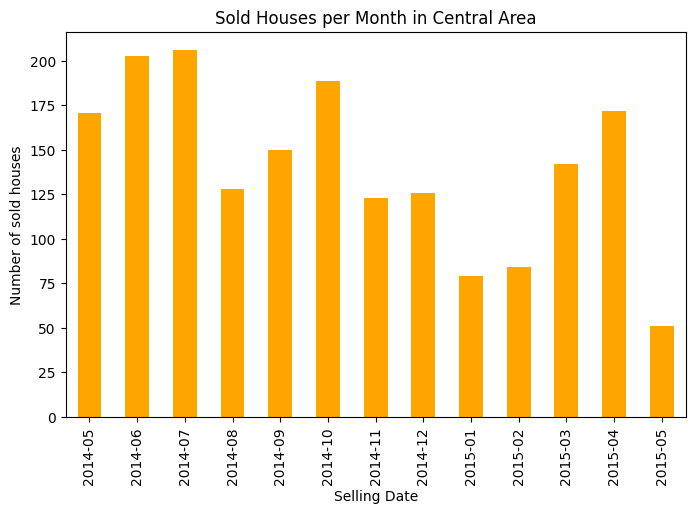

In [116]:
# Filter the DataFrame for central_area == True
df_central = df[df['central_area'] == True]

# Group by month and count occurrences
df_counts = df_central.groupby(df_central['selling_date'].dt.to_period("M")).size().reset_index(name='count')

# Sort by month
df_counts.sort_values(by='selling_date', inplace=True)

# Plot the bar chart
plt.figure(figsize=(10, 6))
df_counts.plot(x='selling_date', y='count', kind='bar', legend=False, color='orange')  # You can choose a color for the bars
plt.title('Sold Houses per Month in Central Area')
plt.xlabel('Selling Date')
plt.ylabel('Number of sold houses')
plt.show()

In [24]:
# Calculating the z-score for the column 'price' and creating new df without price outliers. Threshold is set to 4 (4 std away from mean)
from scipy import stats
z_score = np.abs(stats.zscore(df['price']))
price_thresh = 4
price_outliers = df[z_score > price_thresh]

# Dropping the house price outliers from the dataframe
df_norm = df.drop(price_outliers.index)

In [72]:
# Calculating mean house price for houses in the central area
mean_price_central = df_norm.loc[df['central_area'] == True, 'price'].mean()

# Adding a new column checking if the house is above or below the mean price
df_norm['above_mean_price_central'] = df_norm['price'] > mean_price_central

mean_price_central

684880.9915824916

In [74]:
# Filter houses above mean_price_central
above_mean_price_houses = df_norm[df_norm['above_mean_price_central'] == True]

# Display the filtered DataFrame
above_mean_price_houses

,id,selling_date,sqft_living,sqft_lot,bedrooms,bathrooms,floors,sqft_basement,condition,grade,...,zip_code,lat,long,sqft_living15,sqft_lot15,waterfront,view,price,central_area,above_mean_price_central
9587,472000620,2014-05-02,2600,4750,3,2,1,900,4,9,...,98117,47.683,-122.400,2380,4750,False,0.000,790000,False,True
13967,1818800144,2014-05-02,2390,6550,3,2,1,950,4,8,...,98116,47.571,-122.408,2010,6550,False,2.000,750000,False,True
17388,1868902745,2014-05-02,2710,4500,3,2,2,830,4,8,...,98115,47.675,-122.295,2060,4500,False,0.000,805000,False,True
17024,2326059099,2014-05-02,3310,42998,4,2,2,0,3,9,...,98052,47.723,-122.131,3350,42847,False,0.000,838000,False,True
6705,5652600185,2014-05-02,2240,10578,3,2,2,690,5,8,...,98115,47.695,-122.292,1570,10578,False,0.000,750000,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17383,6815100380,2015-05-14,1900,4000,3,2,1,600,3,7,...,98103,47.685,-122.331,1880,4000,False,0.000,855000,True,True
21434,8562790720,2015-05-14,2630,3757,4,4,2,430,3,10,...,98027,47.532,-122.075,2620,2699,False,0.000,749950,False,True
6191,9178601660,2015-05-14,3320,5354,5,3,2,0,3,9,...,98103,47.654,-122.331,2330,4040,True,0.000,1700000,True,True
19381,8149600265,2015-05-14,1980,5850,4,2,1,600,4,8,...,98116,47.561,-122.391,1810,5850,True,1.000,725000,False,True


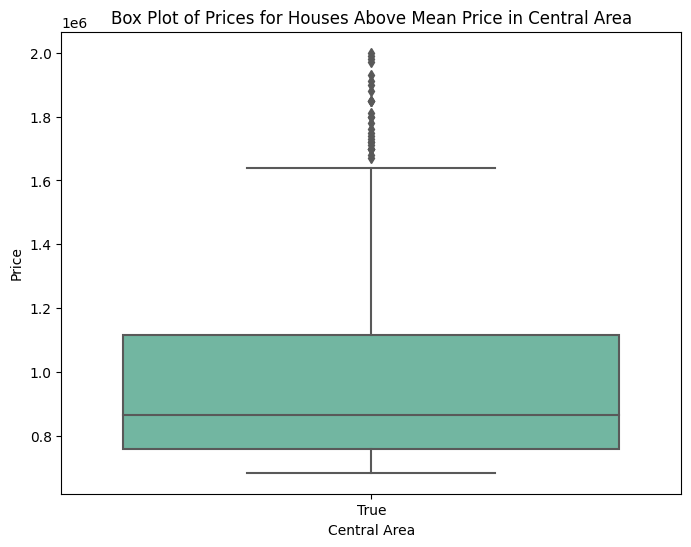

In [89]:
# Filter data for central area
central_data = df_norm[df_norm['central_area'] == True]

# Calculating mean house price for houses in the central area
mean_price_central = central_data['price'].mean()

# Adding a new column checking if the house is above or below the mean price
central_data['above_mean_price_central'] = central_data['price'] > mean_price_central

# Filter houses above mean_price_central
above_mean_price_houses = central_data[central_data['above_mean_price_central'] == True]

# Plotting box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='central_area', y='price', data=above_mean_price_houses, palette='Set2')
plt.xlabel('Central Area')
plt.ylabel('Price')
plt.title('Box Plot of Prices for Houses Above Mean Price in Central Area')
plt.show()

In [68]:
# Filter data for central area
central_data = df_norm[df_norm['central_area'] == True]

# Scatter plot with plotly.express
fig = px.scatter_mapbox(
    central_data,
    lat="lat",
    lon="long",
    color="above_mean_price_central",
    color_discrete_map={False: 'blue', True: 'red'},
    mapbox_style="open-street-map",
    title='Scatter Map Plot of Houses in Central Area',
    labels={'above_mean_price_central': 'Price Category'},
)

fig.update_layout(
    legend_title_text='Price Category',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    height=800,
    width=800,
)

fig.show()

In [95]:
# Creating a new column for the price per sqft.
df_norm['price_per_sqft'] = df_norm['price'] / (df_norm['sqft_living'] + df_norm['sqft_basement'])
df_norm

,id,selling_date,sqft_living,sqft_lot,bedrooms,bathrooms,floors,sqft_basement,condition,grade,...,lat,long,sqft_living15,sqft_lot15,waterfront,view,price,central_area,above_mean_price_central,price_per_sqft
7316,2202500290,2014-05-02,1450,8800,4,1,1,0,4,7,...,47.575,-122.135,1260,8942,False,0.000,435000,False,False,300.000
20586,7853361370,2014-05-02,3310,6500,4,2,2,0,3,8,...,47.515,-121.870,2380,5000,False,0.000,555000,False,False,167.674
1040,7197300105,2014-05-02,1940,10500,4,2,1,800,4,7,...,47.683,-122.114,2200,10500,True,0.000,550000,False,False,200.730
20543,3438501320,2014-05-02,1630,1368,2,2,2,350,3,7,...,47.549,-122.363,1590,2306,False,0.000,295000,False,False,148.990
9587,472000620,2014-05-02,2600,4750,3,2,1,900,4,9,...,47.683,-122.400,2380,4750,False,0.000,790000,False,True,225.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,8149600265,2015-05-14,1980,5850,4,2,1,600,4,8,...,47.561,-122.391,1810,5850,True,1.000,725000,False,True,281.008
12623,4166600610,2015-05-14,1410,44866,3,2,1,0,4,7,...,47.327,-122.370,2950,29152,False,0.000,335000,False,False,237.589
5632,7923600250,2015-05-15,1870,7344,5,2,2,0,3,7,...,47.595,-122.144,1870,7650,False,0.000,450000,False,False,240.642
13040,5101400871,2015-05-24,1390,6670,2,2,1,670,3,6,...,47.691,-122.308,920,6380,False,0.000,445500,False,False,216.262


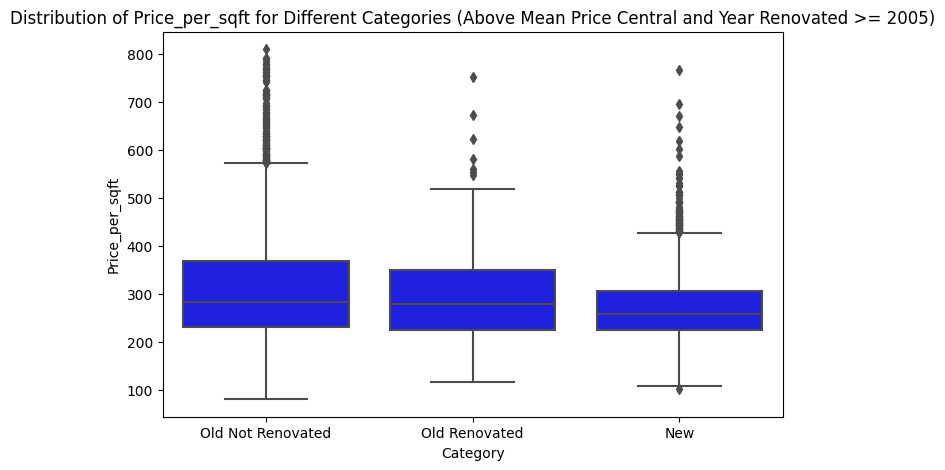

In [114]:

# Calculate values only for rows where 'above_mean_price_central' is True and 'year_renovated' is >= 2005
sqft_old_not_ren = df_norm.loc[(df_norm['year_renovated'] == 0) & (df_norm['year_built'] < 1994) & (df_norm['above_mean_price_central']), 'price_per_sqft']
sqft_old_ren = df_norm.loc[(df_norm['year_renovated'] >= 2010) & (df_norm['year_built'] < 1994) & (df_norm['above_mean_price_central']), 'price_per_sqft']
sqft_new = df_norm.loc[(df_norm['year_built'] > 2000) & (df_norm['above_mean_price_central']), 'price_per_sqft']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Category': ['Old Not Renovated', 'Old Renovated', 'New'],
    'Price_per_sqft': [sqft_old_not_ren.values, sqft_old_ren.values, sqft_new.values]
})

# Create a boxplot
sns.boxplot(x='Category', y='Price_per_sqft', data=plot_data.explode('Price_per_sqft'), color='blue')

# Show the plot
plt.title('Distribution of Price_per_sqft for Different Categories (Above Mean Price Central and Year Renovated >= 2005)')
plt.show()

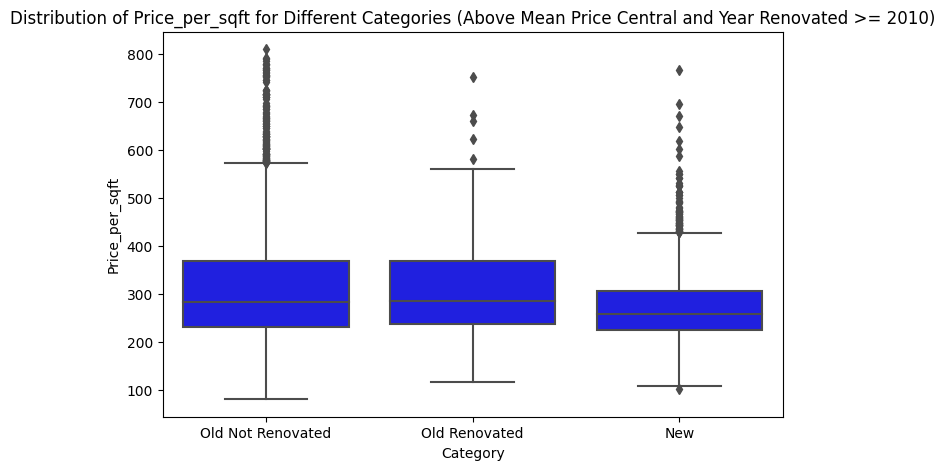

In [110]:

# Calculate values only for rows where 'above_mean_price_central' is True and 'year_renovated' is >= 2010
sqft_old_not_ren = df_norm.loc[(df_norm['year_renovated'] == 0) & (df_norm['year_built'] < 1994) & (df_norm['above_mean_price_central']), 'price_per_sqft']
sqft_old_ren = df_norm.loc[(df_norm['year_renovated'] >= 2000) & (df_norm['year_built'] < 1994) & (df_norm['above_mean_price_central']), 'price_per_sqft']
sqft_new = df_norm.loc[(df_norm['year_built'] > 2000) & (df_norm['above_mean_price_central']), 'price_per_sqft']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Category': ['Old Not Renovated', 'Old Renovated', 'New'],
    'Price_per_sqft': [sqft_old_not_ren.values, sqft_old_ren.values, sqft_new.values]
})

# Create a boxplot
sns.boxplot(x='Category', y='Price_per_sqft', data=plot_data.explode('Price_per_sqft'), color='blue')

# Show the plot
plt.title('Distribution of Price_per_sqft for Different Categories (Above Mean Price Central and Year Renovated >= 2010)')
plt.show()

In [115]:
# Calculate mean values only for rows where 'above_mean_price' is True
mean_sqft_old_not_ren = df_norm.loc[(df['year_renovated'] == 0) & (df_norm['year_built'] < 1994) & (df_norm['above_mean_price_central']), 'price_per_sqft'].mean()
mean_sqft_old_ren = df_norm.loc[(df['year_renovated'] >= 2010) & (df_norm['year_built'] < 1994) & (df_norm['above_mean_price_central']), 'price_per_sqft'].mean()
mean_sqft_new = df_norm.loc[(df['year_built'] > 2000) & (df_norm['above_mean_price_central']), 'price_per_sqft'].mean()

# Display the results
print("Mean price_per_sqft for old not renovated houses:", mean_sqft_old_not_ren)
print("Mean price_per_sqft for old renovated houses:", mean_sqft_old_ren)
print("Mean price_per_sqft for new houses:", mean_sqft_new)

Mean price_per_sqft for old not renovated houses: 314.30424409002666
Mean price_per_sqft for old renovated houses: 313.85821624336694
Mean price_per_sqft for new houses: 275.233509808268


In [29]:
import plotly.express as px
# Creating a new column 'mean_sqft_old_not_ren' that calculates the mean sqft price for houses which older than 10 years and have not been renovated
# Creating a new column 'mean_sqft_old_ren' that calcuates the mean sqft price for houses which older than 10 years and have been renovated within the last 10 years.
# Creating a new column 'mean_sqft_new' that calcuates the mean sqft price for houses which younger than 1999.

# Adding new column checking if house is above or below mean price
df['above_mean_price'] = df['price'] > mean_price

# Adding new column's calculating the price per sqft_living(15) and sqft_lot(15). I need that later.
df['sqft_living_price'] = df['price'] / df['sqft_living']
df['sqft_lot_price'] = df['price'] / df['sqft_lot']
df['sqft_living15_price'] = df['price'] / df['sqft_living15']
df['sqft_lot15_price'] = df['price'] / df['sqft_lot15']

# Calculating the z-score for the column 'price' and creating new df without price outliers. Threshold is set to 5 (5 std away from mean)
from scipy import stats
z_score = np.abs(stats.zscore(df['price']))
price_thresh = 5
price_outliers = df[z_score > price_thresh]

# Dropping the house price outliers from the dataframe
df_norm = df.drop(price_outliers.index)

# Plotting below and above average mean price houses.
# We see a very clear concentration of house price above the mean in the northern parts of King County.
fig = px.scatter_mapbox(df_norm, lat='lat', lon='long', zoom=10, height=800, color = 'above_mean_price')
fig.update_layout(title='Houses in King County')
fig.update_layout(mapbox_style="open-street-map")

fig.show()
#df.head()

In [28]:
#heatmap using folium
import folium
from folium.plugins import HeatMap

# Create a map centered around King County
m = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=10)

# Prepare data
heat_data = [[row['lat'], row['long']] for index, row in df.iterrows()]

# Add heat map layer to the map
HeatMap(heat_data).add_to(m)

# Display the map
m